<a href="https://colab.research.google.com/github/asange/mit-deep-learning/blob/master/tf_basic_class_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.13.0-rc1


In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
class_names =  ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

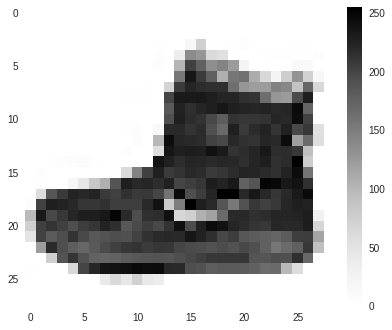

In [14]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)

In [0]:
train_images = train_images / 255.0
test_images = test_images /255.0

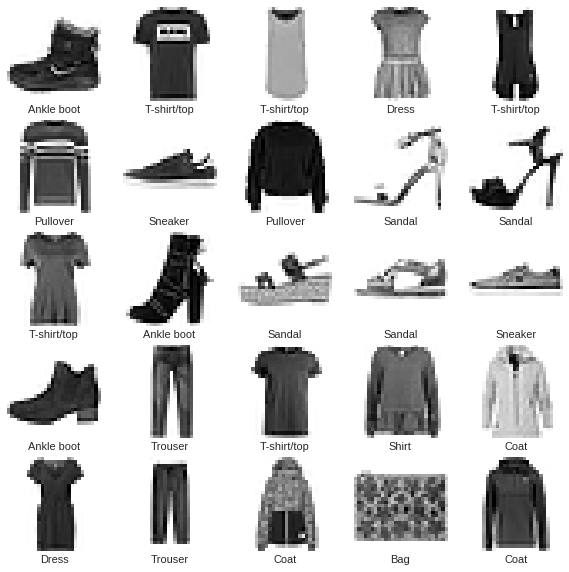

In [22]:
plt.figure(figsize = (10, 10))
for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap = plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
  

In [0]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [0]:
model.compile(optimizer=tf.train.AdamOptimizer(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [33]:
model.fit(train_images, train_labels, epochs = 5)

Epoch 1/5
60000/60000 [==============================] - 6s 95us/sample - loss: 0.4991 - acc: 0.8258
Epoch 2/5
60000/60000 [==============================] - 5s 82us/sample - loss: 0.3772 - acc: 0.8644
Epoch 3/5
60000/60000 [==============================] - 5s 83us/sample - loss: 0.3391 - acc: 0.8774
Epoch 4/5
60000/60000 [==============================] - 5s 86us/sample - loss: 0.3156 - acc: 0.8846
Epoch 5/5
60000/60000 [==============================] - 5s 86us/sample - loss: 0.2968 - acc: 0.8905


In [35]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 48us/sample - loss: 0.3425 - acc: 0.8760
Test accuracy: 0.876


In [37]:
predictions = model.predict(test_images)
predictions[0]

array([3.2840508e-06, 9.6985389e-09, 2.5443237e-06, 3.8989288e-08,
       1.5824996e-06, 5.0471269e-02, 2.4111019e-05, 2.6089238e-02,
       7.0102091e-05, 9.2333782e-01], dtype=float32)

In [68]:
np.argmax(predictions[1123]), test_labels[1123]

(5, 7)

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)
  
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label], 
                                      100*np.max(predictions_array),
                                      class_names[true_label]),
                                      color = color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  thisplot = plt.bar(range(10), predictions_array, color = '#777777')
  plt.ylim([0,1])
  predicted_label = np.argmax(predictions_array)
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')
  
  

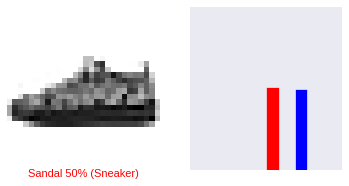

In [67]:
i = 1123
plt.figure(figsize=(6, 3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1, 2,2)
plot_value_array(i, predictions, test_labels)

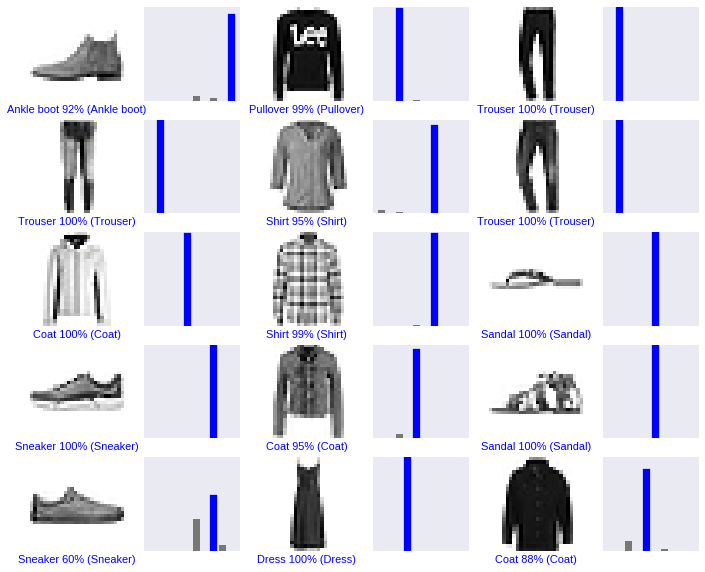

In [70]:
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)

In [72]:
img = test_images[0]
print(img.shape)

(28, 28)


In [73]:
img = (np.expand_dims(img, 0))
print(img.shape)

(1, 28, 28)


In [74]:
predictions_single = model.predict(img)
print(predictions_single)

[[3.2840535e-06 9.6985193e-09 2.5443258e-06 3.8989356e-08 1.5825024e-06
  5.0471358e-02 2.4111016e-05 2.6089242e-02 7.0102149e-05 9.2333770e-01]]


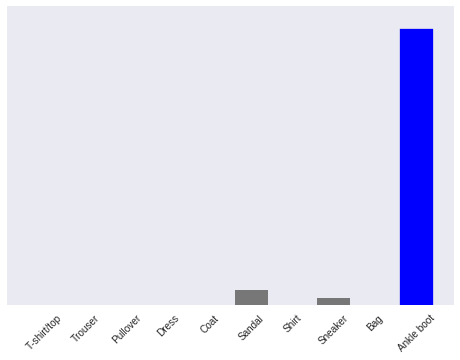

In [78]:
plot_value_array(0, predictions_single, test_labels) 
_ = plt.xticks(range(10), class_names, rotation=45)

In [79]:
np.argmax(predictions_single[0])

9